In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

### Week 4: NLP with Disaster Tweets

#### Problem
This project will be looking at various Tweets from the social media platform Twitter/X, and building a Natural Language Processing Model to identify whether a tweet is indicating a disaster occurence or not. This project will use data from https://www.kaggle.com/c/nlp-getting-started/overview, using training data labeled with text, keywords, location, and whether or not it's a real disaster or not.

#### EDA
Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 

First starting out by importing the CSVs and taking a look at the training data.

In [10]:
train_df = pd.read_csv('nlp-getting-started/train.csv')
test_df = pd.read_csv('nlp-getting-started/test.csv')
submit_df = pd.read_csv('nlp-getting-started/sample_submission.csv')

print(train_df.info())
print("Columns: ", train_df.columns)
print("Training data shape: ", train_df.shape)
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
Columns:  Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Looking at the data from train_df.info(), there's 7613 total entries with 5 columns in the data set, but 2533 of them are missing location data, and 61 of them are missing keywords. 

Looking at the test data, missing location/keyword data is a regular occurence, so I'll likely want to keep entries with missing info during training still, but it's worth keeping in mind.  

### Maybe use fillna to fill null with ''?

In [6]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


I also want to check the balance of the data to see if it's heavily skewed towards either label. Looking at the graph, there's about a 1000 more 0s than 1s, but it's not overly imbalanced, so I'll keep it as is.

target
0    4342
1    3271
Name: count, dtype: int64


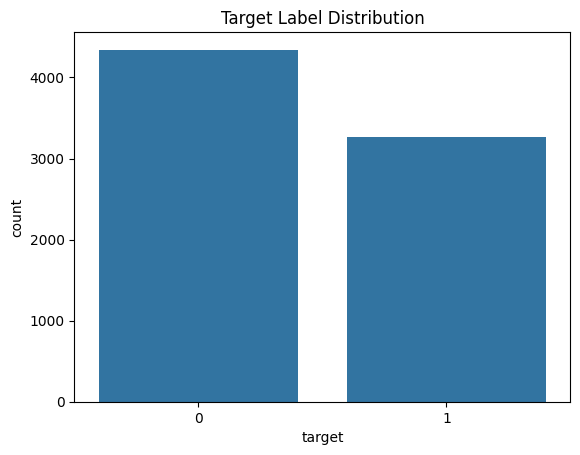

In [11]:
print(train_df['target'].value_counts())
sns.countplot(x='target', data=train_df)
plt.title('Target Label Distribution')
plt.show()

In [16]:
# Preprocessing text
import spacy

nlp = spacy.load("en_core_web_sm")

def text_preprocess(text):
    # Lower casing
    doc = nlp(text.lower())

    # Removing Punctuation, Stop words, and Tokenizing
    tokens = [token.lemma_ for token in doc if (not token.is_stop and not token.is_punct and not token.is_digit)] 

    return ' '.join(tokens)

# Do I actually want to remove stop words?
train_df['clean_text'] = train_df['text'].apply(text_preprocess)
test_df['clean_text'] = test_df['text'].apply(text_preprocess)
print("Clean text example: " + train_df['clean_text'][0])

Clean text example: deed reason earthquake allah forgive


We want to preprocess the data a bit and split the training data into training and validation sets. I'll split 0/1 individually so there's an even distribution of 0/1s in the test and validation set.

In [ ]:
# Splitting sets
from sklearn.model_selection import train_test_split

zeros = train_df[train_df['target'] == '0']
ones = train_df[train_df['target'] == '1']

train0, val0 = train_test_split(zeros, test_size=0.3, random_state=10)
train1, val1 = train_test_split(ones, test_size=0.3, random_state=10)

train_set = pd.concat([train0, train1])
val_set = pd.concat([val0, val1])

#### Model Architecture

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. 

Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.  

There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.

Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.). 

In [15]:
# Creating basic architecture
MAX_WORDS = 20000
# EMBEDDING_DIM = 128

def basic_RNN():
    model = Sequential([
        Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
        Bidirectional(LSTM(64, return_sequence=True)),
        Dropout(0.5),
        Bidirectional(LSTM(32)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

basic_model = basic_RNN()
basic_model.summary()

NameError: name 'MAX_WORDS' is not defined

In [ ]:
#

#### Results and Analysis
Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

#### Conclusion
Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?